### TUGAS 2 MACHINE LEARNING

#### Nama: Sabina Nurlatifah Aurelia

#### NIM: 2209106002

    Link Dataset
https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset/data

    Deskripsi tentang dataset

Dataset ini dirancang untuk memprediksi jenis tanaman paling cocok berdasarkan kondisi tanah dan iklim. Ini berguna dalam pertanian presisi, membantu petani dan pengambil kebijakan menentukan tanaman terbaik untuk ditanam 

Dataset mencakup 7 fitur agro-klimatik seperti kandungan nitrogen, fosfor, kalium, suhu, kelembapan, pH tanah, dan curah hujan, dengan label output berupa nama tanaman (contoh: padi, jagung, kapas, dll). Tujuannya adalah membangun model machine learning yang dapat memberikan rekomendasi tanaman optimal berdasarkan kondisi lingkungan.

    Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


    Read Dataset

In [2]:
df = pd.read_csv("crop_recommendation.csv")

    Preprocessing

In [3]:
# Data Cleaning
df = df.drop_duplicates()
df = df.dropna()

# Encode label tanaman
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Pisah fitur dan target
X = df.drop(['label', 'label_encoded'], axis=1)
y = to_categorical(df['label_encoded'])

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


    Mengapa melakukan preprocessing?

Preprocessing bertujuan untuk menyiapkan data agar bisa dipahami oleh model.

- Menghapus duplikasi → Menghindari data berulang.
- Menangani nilai kosong → Agar data lengkap dan valid.
- Standarisasi (Z-score) → Menyamakan skala semua fitur (agar model belajar lebih baik).
- Encoding label → Ubah nama tanaman jadi angka agar bisa diklasifikasi.
- Split data (train-test) → Pisahkan data untuk melatih dan menguji model secara adil.

    Arsitektur deep learning: MLP (Multilayer Perceptron)

In [4]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
88/88 [==============================] - 1s 4ms/step - loss: 2.5445 - accuracy: 0.3111 - val_loss: 1.8702 - val_accuracy: 0.5710
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 1.4328 - accuracy: 0.6179 - val_loss: 0.8905 - val_accuracy: 0.8182
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.8442 - accuracy: 0.7493 - val_loss: 0.5419 - val_accuracy: 0.8580
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.8033 - val_loss: 0.3860 - val_accuracy: 0.9119
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8366 - val_loss: 0.3136 - val_accuracy: 0.9119
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8622 - val_loss: 0.2609 - val_accuracy: 0.9091
Epoch 7/100
88/88 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8821 - val_loss: 0.2326 - val_accuracy: 0.9176
Epoch 8/100
8

Selama 100 epoch pelatihan, model menunjukkan peningkatan kinerja yang konsisten. Akurasi validasi naik dari 59,94% di epoch pertama hingga mencapai puncaknya sebesar 98,58% pada epoch ke-54 dan ke-67, dengan penurunan signifikan pada nilai loss. 

    Evaluasi Model

In [5]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")


14/14 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9682

✅ Test Accuracy: 0.9682


    Visualisasi

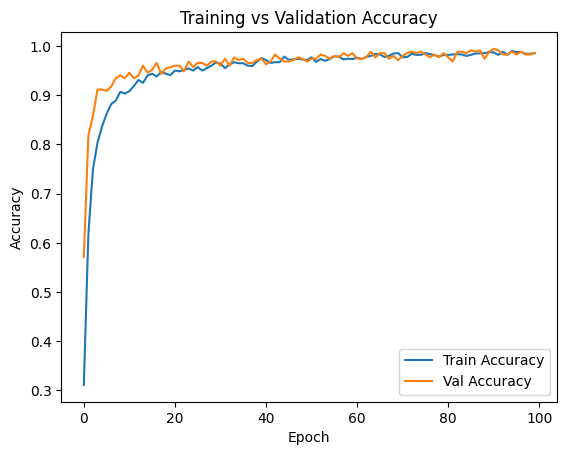

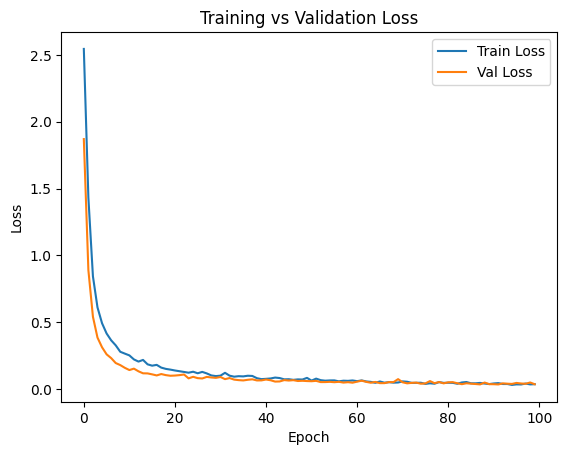

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Berdasarkan grafik Training vs Validation Accuracy dapat disimpulkan bahwa grafik menunjukkan akurasi pelatihan dan validasi meningkat pesat di awal dan stabil mendekati 1.0 setelah sekitar 30 epoch. Konsistensi antara keduanya menandakan model belajar dengan baik tanpa overfitting, sehingga mampu melakukan generalisasi secara efektif.


Berdasarkan grafik Training vs Validation Loss, dapat disimpulkan bahwa nilai loss pelatihan dan validasi menurun hingga di bawah 0.1 dan stabil setelah epoch ke-50, tanpa gap signifikan, menandakan pembelajaran efektif, konvergensi tercapai, dan tidak terjadi overfitting.


    Eksperimen

In [18]:
# Prediksi menggunakan model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)   # indeks kelas prediksi
y_true = np.argmax(y_test, axis=1)          # indeks kelas asli

# Tampilkan 5 contoh hasil klasifikasi
for i in range(5):
    print(f"Contoh ke-{i+1}:")
    print(f"  Fitur (X_test): {X_test[i]}")
    print(f"  Label asli: {le.inverse_transform([y_true[i]])[0]}")
    print(f"  Prediksi model: {le.inverse_transform([y_pred[i]])[0]}")
    print()


14/14 [==============================] - 0s 1ms/step
Contoh ke-1:
  Fitur (X_test): [ 1.36682815 -1.10262304 -0.02269297  0.7659645   1.04444468 -0.36758967
 -1.40420762]
  Label asli: muskmelon
  Prediksi model: muskmelon

Contoh ke-2:
  Fitur (X_test): [ 1.28554704 -1.37552907  0.05630155  0.11122799  0.67572532 -0.27158762
 -0.98338819]
  Label asli: watermelon
  Prediksi model: watermelon

Contoh ke-3:
  Fitur (X_test): [0.22889255 0.26190709 0.01680429 3.5049737  0.98254107 0.61002851
 0.20591921]
  Label asli: papaya
  Prediksi model: papaya

Contoh ke-4:
  Fitur (X_test): [-0.17751303  0.2012613   0.13529608  1.71141724  0.85691408  0.45994921
 -0.08960047]
  Label asli: papaya
  Prediksi model: papaya

Contoh ke-5:
  Fitur (X_test): [-0.5568249   2.53612396  2.99884775 -0.53370693  0.86361433 -1.11929398
  0.2755585 ]
  Label asli: apple
  Prediksi model: apple

